In [127]:
######################
#import useful modules
######################

import sys

sys.path.append("/home/gula/Desktop/Work_capella/Python/Python_Modules_p3/") 

import matplotlib; matplotlib.use('Agg')
import matplotlib.colors as colors

########

%matplotlib inline

from Modules import *
from Modules_gula import *

from matplotlib.offsetbox import AnchoredText
import cartopy.crs as ccrs


## Load simulations

In [128]:
########################################
# Load mean simul
########################################

folder = './Figures/'

simulname_mean = 'nesev_kpp_his500_mean'

simul  = load(simul = simulname_mean, output=False)
simul0  = load(simul = simulname_mean, output=False)

# for x_section
simul_vert = load(simul = simulname_mean + ' [605-20,605+20,1261-200+50,1261+200+50,[1,300,1]] 0', output=False);

# coordinates for vertical sections
ix = 1261 - simul.coord[2]; iy = 605 - simul.coord[0]
iy1,iy2 = iy-200,iy+200
ix1,ix2 = ix-200+50,ix+200+50
Ly = 20

########################################
# Load snapshot
########################################

mytime = 634; simulname = 'nesev_kpp'
#time = 100; simulname = 'nesec_1h_withdiags'

simul_his = load(simul = simulname, time=mytime, output=False);

# for x_section
simul_his_vert = load(simul = simulname + ' [605-20,605+20,1261-200+50,1261+200+50,[1,300,1]] ' + format(mytime), output=False);


#################################################


### plotting functions

In [129]:

#########
# plotting functions
#########

################
fontsize0 = 5
fontsize1 = 12
fontsize2 = format(16)
fontsize3 = format(20)
font = {'size'   : fontsize1}
plt.rc('font', **font)    

#############



In [130]:
#################################################=
# Horizontal Plot at different depths
#################################################


coord = 'deg'

if coord=='deg':
    #using lon,lat
    lon = simul.x; lat = simul.y
    xlabel = 'lon'; ylabel = 'lat'
elif coord=='km':
    # using km
    [lon,lat] = np.meshgrid(np.arange(simul.x.shape[0])+simul.coord[2],np.arange(simul.x.shape[1])+simul.coord[0])
    lon = (lon/np.mean(simul.pm)*1e-3).T
    lat = (lat/np.mean(simul.pn)*1e-3).T
    xlabel = 'km'; ylabel = 'km'
elif coord=='points':
    # using grid points
    [lon,lat] = np.meshgrid(np.arange(simul.x.shape[0])+simul.coord[2],np.arange(simul.x.shape[1])+simul.coord[0])
    #[lon,lat] = np.meshgrid(np.arange(simul.x.shape[0]),np.arange(simul.x.shape[1]))
    lon,lat = lon.T,lat.T
    xlabel = 'grid pts'; ylabel = 'grid pts'
    
    
    
    

def plot_horizontal(varname,myvar,u,v, mydepth = -2800, panel = ' ', xaxis=1,yaxis=1,\
                          ax = None):
 
    

    #################################################
  
    if varname == 'vrt':
        coeflev = 5; levels =  np.arange(-1.,1.01,0.01)*coeflev
        my_cmap=plot.ncview_colormap('blu_red')
        title = r'$\zeta$ [10$^{-5}$ s$^{-1}$]'
    elif varname=='pv':
        coeflev = 1e-10
        #my_cmap=plot.ncview_colormap('blu_red')
        my_cmap=plot.ncview_colormap_asym('blu_red',ratio=4)
        levels =  np.arange(-.5,2.01,0.01)*coeflev
        title = r'$q\,(s^{-3})$'
    elif varname=='w':
        coeflev = 1e-2; levels =  np.arange(-1.,1.01,0.01)*coeflev
        my_cmap=plot.ncview_colormap('bw')
        title = 'w'
    elif varname=='Ri':
        coeflev = 1.; levels =  np.arange(0.,1.01,0.01)*coeflev
        my_cmap=plot.ncview_colormap('jaisnc')
        title = 'Ri'
    elif varname=='dzu':
        coeflev = 0.5e-2; levels =  np.arange(0.,1.01,0.01)*coeflev
        my_cmap=plot.ncview_colormap('blu_red')
        title = r'$\sqrt{\left( \frac{\partial u}{\partial z} \right)^2+\left( \frac{\partial v}{\partial z} \right) ^2}$'
    elif varname == 'AKt': 
        #myvar = np.log10(np.abs(myvar)); levels = np.linspace(-5,-2.,100)
        my_cmap=plot.ncview_colormap('jaisnb')
        title = r'$\left< K_{\rho} \right>$'

    #################################################
    
    if varname=='AKt':
         plt.pcolormesh(lon,lat,ma.masked_invalid(myvar),
                    cmap = my_cmap, norm=colors.LogNorm(vmin=1e-5, vmax=1e-2),shading='auto'); 
    elif varname=='vrt':
        plt.pcolormesh(tools.rho2psi(lon), tools.rho2psi(lat),ma.masked_invalid(myvar)*1e5,
                    cmap = my_cmap, vmin=levels.min(), vmax=levels.max(),shading='auto'); 
       
    else:
        if myvar.shape[0] == simul.x.shape[0]:
            plt.pcolormesh(lon,lat,ma.masked_invalid(myvar),
                        cmap = my_cmap, vmin=levels.min(), vmax=levels.max(),shading='auto'); 
        else:
            plt.pcolormesh(tools.rho2psi(lon), tools.rho2psi(lat), ma.masked_invalid(myvar), 
                         vmin=levels.min(),vmax=levels.max(),
                         cmap = my_cmap,shading='auto'); 

    plt.colorbar()
    
    
    #################
    # add vectors
    #################

    nnu = nnv = 40; normu = 0.5
    CS1u = plt.quiver(lon[::nnu,::nnv],lat[::nnu,::nnv],u[::nnu,::nnv], v[::nnu,::nnv],\
                                        pivot='mid',color='k',\
                              scale=5.,minlength=0,minshaft=2,alpha=0.5);
    t1=plt.quiverkey(CS1u,0.2,0.2,normu,r'$u,v\,=\,$' + format(normu) + '$\,m.s^{-1}$',coordinates='axes',color='r',fontproperties={'size': '16' })
    CS1 = plt.contour(lon,lat,simul.topo,[100,1000,2000,3000],colors = ('k',), linewidths = (1.,));
    plt.clabel(CS1, fmt = '%2.0f', colors = 'k', fontsize=6)  ;

    #################
    # add section
    #################
    
    if coord=='deg':
        ### straight line
        #plt.plot(lon[ix,iy1:iy2],lat[ix,iy1:iy2],'k-',linewidth=3,alpha=0.5)
        plt.plot(lon[ix1:ix2,iy],lat[ix1:ix2,iy],linewidth=3.,color='k',alpha=0.8, linestyle='--')


    ###################
    
    if coord=='deg': 
        extent = [-64.5,-60,37.5,40]; plt.axis(extent)
    elif coord=='points':
        extent = [ix1+simul.coord[2],ix2+simul.coord[2],iy1+simul.coord[0],iy2+simul.coord[0]];
        plt.axis(extent)

    ###################
    # title / panel;

    if panel!=' ':
        color = 'w'; box = 'circle,pad=0.2'; props = dict(boxstyle=box, fc=color, ec='k', lw=1, alpha=1.)
        ax.text(0.05,0.95,panel, fontsize=fontsize3,  horizontalalignment='left', verticalalignment='top',\
                 bbox=props, transform=ax.transAxes)

    if title!=' ':    
        color = 'w'; box = 'round,pad=0.2'; props = dict(boxstyle=box, fc=color, ec='k', lw=1, alpha=1.)
        ax.text(0.95,0.05,title, fontsize=fontsize2,  horizontalalignment='right', verticalalignment='bottom',\
                 bbox=props, transform=ax.transAxes)
    

    #################################
    # labels
    

    plt.xlabel(xlabel,fontsize=fontsize2); plt.ylabel(ylabel,fontsize=fontsize2)
    
    if xaxis==0: ax.xaxis.set_major_formatter( NullFormatter() ); plt.xlabel(' ')
    if yaxis==0: ax.yaxis.set_major_formatter( NullFormatter() ); plt.ylabel(' ')
        
    #ax.text(1.,0.95,vartitle, fontsize=fontsize3,  horizontalalignment='left', verticalalignment='top',\
    #        transform=ax.transAxes)
    
        
    if ax is not None:

        at = AnchoredText(r'$z =$'+format(mydepth)+ ' m',loc=3, prop=dict(size=18), frameon=True, )
        at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
        ax.add_artist(at)

    ###################
    
    if ax is None:

        plt.savefig(folder + simul.simul + '_map_AKt_' + format(-mydepth) + '_' +  'mean.png', size=None, figure=None , magnification='auto',transparent='true', dpi=200); 


'''#################################################
# Plot  data
#################################################

fig = plt.figure(figsize=(12.0,6.0))

###################

ax1 = plt.subplot(1,1,1);
        
plot_horizontal('vrt', vrt_horiz, u_horiz_mean, v_horiz_mean, mydepth = -2800, panel='e', ax = ax1)
'''

"#################################################\n# Plot  data\n#################################################\n\nfig = plt.figure(figsize=(12.0,6.0))\n\n###################\n\nax1 = plt.subplot(1,1,1);\n        \nplot_horizontal('vrt', vrt_horiz, u_horiz_mean, v_horiz_mean, mydepth = -2800, panel='e', ax = ax1)\n"

In [131]:

def plot_section(varname,myvar,AKt, buoy, mysimul, panel = ' ', xaxis=1,yaxis=1,\
                         mean=False,inset=True,iy=Ly, ax = None):
 

    ######
    # cross-section mean?

    if mean:
        myvar = np.nanmean(myvar[:,1:-1,:],1)
        mybuoy = np.nanmean(buoy[:,1:-1,:],1)
        np.nanmean(AKt[:,1:-1,:],1)
    else:
        myvar = myvar[:,iy,:]
        mybuoy = buoy[:,iy,:]
        AKt = AKt[:,iy,:]
        

    #################################################
    #Compute coordinates
    #################################################
    
    # using km
    [lon,lat] = np.meshgrid(np.arange(mysimul.x.shape[0])+mysimul.coord[2],np.arange(mysimul.x.shape[1])+mysimul.coord[0])
    lon = (lon/np.mean(mysimul.pm)*1e-3).T
    lat = (lat/np.mean(mysimul.pn)*1e-3).T
    lon -= lon[0,0]
    
    [z_r,z_w] = tools.get_depths(mysimul)
    
    myz = z_r[:,iy,:]
    myz_w = z_w[:,iy,:]
    del z_r,z_w

    # define lon in 3d
    mylat3d = copy(myz)
    for iz in range(mylat3d.shape[1]):
        mylat3d[:,iz] = lon[:,iy]

    mylat3d_w = copy(myz_w)
    for iz in range(mylat3d_w.shape[1]):
        mylat3d_w[:,iz] = lon[:,iy]
        
    del lon,lat
        
    ###
    
    if varname == 'vrt':
        coeflev = 5; levels =  np.arange(-1.,1.01,0.01)*coeflev
        my_cmap=plot.ncview_colormap('blu_red')
        title = r'$\zeta$ [10$^{-5}$ s$^{-1}$]'
    elif varname=='pv':
        coeflev = 1e-10
        #my_cmap=plot.ncview_colormap('blu_red')
        my_cmap=plot.ncview_colormap_asym('blu_red',ratio=4)
        levels =  np.arange(-.5,2.01,0.01)*coeflev
        title = r'$q\,(s^{-3})$'
    elif varname=='w':
        coeflev = 1e-2; levels =  np.arange(-1.,1.01,0.01)*coeflev
        my_cmap=plot.ncview_colormap('bw')
        title = 'w'
    elif varname=='Ri':
        coeflev = 1.; levels =  np.arange(0.,1.01,0.01)*coeflev
        my_cmap=plot.ncview_colormap('jaisnc')
        title = 'Ri'
    elif varname=='dzu':
        coeflev = 0.5e-2; levels =  np.arange(0.,1.01,0.01)*coeflev
        my_cmap=plot.ncview_colormap('blu_red')
        title = r'$\sqrt{\left( \frac{\partial u}{\partial z} \right)^2+\left( \frac{\partial v}{\partial z} \right) ^2}$'
    elif varname == 'AKt': 
        #myvar = np.log10(myvar); levels = np.linspace(-5,-2.,100)
        my_cmap=plot.ncview_colormap('jaisnb')
        title = r'$\left< K_{\rho} \right>$'
        
    #################################################

    
    if varname in ['vrt']:
        CS1 = plt.pcolormesh(mylat3d,myz,myvar,\
                    vmin=levels.min(), vmax=levels.max() ,cmap = my_cmap, shading='auto');
    elif varname in ['pv']:
        CS1 = plt.pcolormesh(mylat3d_w,myz_w,myvar,\
                    vmin=levels.min(), vmax=levels.max() ,cmap = my_cmap, shading='auto');
    elif varname in ['w']:
        CS1 = plt.pcolormesh(mylat3d,myz,myvar,\
                    vmin=levels.min(), vmax=levels.max() ,cmap = my_cmap, shading='auto');
    elif varname in ['Ri','dzu']:
        CS1 = plt.pcolormesh(mylat3d_w,myz_w,myvar,\
                    vmin=levels.min(), vmax=levels.max() ,cmap = my_cmap, shading='auto');
    elif varname=='AKt':
        CS1 = plt.pcolormesh(mylat3d_w,myz_w,myvar,\
                    norm=colors.LogNorm(vmin=1e-5, vmax=1e-2) ,cmap = my_cmap, shading='auto');

    #if varname == 'AKt': 
    #    plt.colorbar(CS1,ticks=[-5,-4,-3,-2,-1])             
    #else:
    
    plt.colorbar(CS1)
    

    ####
    # add AKt contours
    
    if varname != 'AKt':
        plt.rcParams.update({'hatch.color': 'k'})
        #CS1 = plt.contour(mylat3d_w,myz_w,AKt,[5e-5],colors = ('Gainsboro',), linewidths = (2.,),alpha = 1.);
        plt.contourf(mylat3d_w,myz_w,AKt,[5e-5,1.], colors='none', linewidth=0, hatches=['///'], alpha=0.,extend='lower')



    ####
    # add potential density contours
    
    color='k'
    #plt.contour(mylat3d,myz,np.abs(mybuoy),np.arange(24.0,28.5,0.25),colors = (color,),linewidths = (0.5,));
    #plt.contour(mylat3d,myz,np.abs(mybuoy),np.arange(27.5,29.,0.05),colors = (color,),linewidths = (0.5,));
    CS2 = plt.contour(mylat3d,myz,mybuoy,np.arange(24.0,30.,0.5),colors = (color,),linewidths = (1.5,));
    plt.clabel(CS2, fmt = '%2.1f', colors = color, fontsize=fontsize1)
    CS2 = plt.contour(mylat3d,myz,mybuoy,np.arange(27.6,28.,0.1),colors = (color,),linewidths = (0.5,));
    plt.clabel(CS2, fmt = '%2.1f', colors = color, fontsize=fontsize1)


    ###
    
    '''#cb = fig.colorbar(joe,ticks=oldsim.clabels(levels),shrink=0.5)
    cbar_ax = fig.add_axes([0.97, 0.0, 0.02, 1.])
    cb = fig.colorbar(CS1,ticks=[-5,-4,-3,-2,-1], cax=cbar_ax)
    #cb.formatter.set_powerlimits((0, 0))
    #cb.ax.yaxis.set_offset_position('left')
    #cb.update_ticks()'''
    
    
    if inset:
        ###################
        # begin : map inset 

        central_lon, central_lat = -33,10
        projection = ccrs.Orthographic(central_lon, central_lat)

        xc,yc,wi,hi  = 0.6,0.7,0.22,0.2
        aa      = plt.axes([xc,yc,wi,hi],projection=projection)
        extent = [np.min(mysimul0.x),np.max(mysimul0.x),np.min(mysimul0.y),np.max(mysimul0.y)]
        aa.set_extent(extent); 
        aa.coastlines(resolution='10m')
        aa.stock_img(); 

        gl = aa.gridlines(draw_labels=True)
        gl.xlabel_style = {'size': fontsize1, 'color': 'gray', 'weight': 'bold'}
        gl.ylabel_style = gl.xlabel_style
        gl.xlabels_top = False
        gl.ylabels_left = False

        CS1 = plt.pcolormesh(mysimul0.x,mysimul0.y,mysimul0.topo * mysimul0.mask, cmap = 'gist_earth',transform=ccrs.PlateCarree())

        #plt.plot(newlon[:,iy],newlat[:,iy],linewidth=3.,color='k',alpha=0.8, linestyle='-',transform=ccrs.PlateCarree())

    if ax is not None:
        ###################
        # title / panel;

        if panel!=' ':
            color = 'w'; box = 'circle,pad=0.2'; props = dict(boxstyle=box, fc=color, ec='k', lw=1, alpha=1.)
            ax.text(0.05,0.95,panel, fontsize=fontsize3,  horizontalalignment='left', verticalalignment='top',\
                     bbox=props, transform=ax.transAxes)

        if title!=' ':    
            color = 'w'; box = 'round,pad=0.2'; props = dict(boxstyle=box, fc=color, ec='k', lw=1, alpha=1.)
            ax.text(0.95,0.05,title, fontsize=fontsize2,  horizontalalignment='right', verticalalignment='bottom',\
                     bbox=props, transform=ax.transAxes)


        #################################
        # labels

        
        ax.set_ylabel('Depth (m)',fontsize=fontsize2)
        ax.set_xlabel('Along-track distance (km)',fontsize=fontsize2)

        if xaxis==0: ax.xaxis.set_major_formatter( NullFormatter() ); plt.xlabel(' ')
        if yaxis==0: ax.yaxis.set_major_formatter( NullFormatter() ); plt.ylabel(' ')

        #ax.text(1.,0.95,vartitle, fontsize=fontsize3,  horizontalalignment='left', verticalalignment='top',\
        #        transform=ax.transAxes)


    ###################
    
    if ax is None:
        
        figname = '_' + '{0:04}'.format(mysimul.time)+'.png'
        if mean:    figname = '_mean' + figname
        figname =   '_rot'  +  figname 
        plt.savefig(folder + mysimul.simul + '_' + varname + figname ,bbox_inches='tight', transparent='true', dpi=150)


#################################################



#plot_section('AKt',AKtrot_mean,AKtrot_mean,rhorot_mean,simul_vert,mean=False,inset=False)




### Compute Mean diffusivity

In [132]:
##########
# Compute mean fields
##########
   
mydepth = -2800
mydepths=np.array([mydepth]); #np.arange(-5000,0,1000)


AKt_horiz_mean = var('AKt',simul, depths=mydepths).data;
u_horiz_mean = tools.u2rho(var('u',simul, depths=mydepths).data);
v_horiz_mean = tools.v2rho(var('v',simul, depths=mydepths).data);

if coord=='deg':
    [u_horiz_mean[:,:],v_horiz_mean[:,:]] = tools.rotuv(simul_his,u_horiz_mean[:,:],v_horiz_mean[:,:],psi=False)

##########################


In [133]:

rhorot_mean =  var('rho1',simul_vert).data + simul.rho0 - 1000.
AKtrot_mean = var('AKt',simul_vert).data


### Compute Vorticity /shear for a snapshot

In [135]:
##########
# Compute time-varying fields
##########
   
time = mytime; simul_his.update(time)

################

vrt_horiz = var('vrt',simul_his, depths=mydepths).data;

u_horiz = tools.u2rho(var('u',simul_his, depths=mydepths).data);
v_horiz = tools.v2rho(var('v',simul_his, depths=mydepths).data);

if coord=='deg':
    [u_horiz[:,:],v_horiz[:,:]] = tools.rotuv(simul_his,u_horiz[:,:],v_horiz[:,:],psi=False)

##########################


time of simulation is: 634
/data0/project/meddle//gula/ROMS/Simulations/NESEV/NESEV_KPP/nesev_his.00634.nc


In [136]:
varname = 'vrt'; varname2 = 'dzu'


#################################################=
# Rotated Section
#################################################

vrtrot = var(varname,simul_his_vert).data
dzurot = var(varname2,simul_his_vert).data

if varname =='vrt': vrtrot = tools.psi2rho(vrtrot) * 1e5

rhorot = var('rho1',simul_his_vert).data + simul_his.rho0 - 1000.
AKtrot = var('AKt',simul_his_vert).data



## Mean vertical profile of diffusivity

In [137]:
#################################################=
# Profiles over the region
#################################################

mydepth = -2800 # for the horizontal section
depths = np.arange(-5200,0,10)
idepth = np.nanargmin(np.abs(depths-mydepth))

#################################################

# load a zoom to save time
simul_zoom = load(simul = simulname_mean + ' [605-300-100,605+300+100,1261-300+50-100,1261+300+100,[1,300,1]] 0', output=False);

AKt = var('AKt',simul_zoom,depths=depths).data;
AKta = np.nanmean(np.nanmean(AKt,0),0)

#################################################=
# coordinates for vertical sections

add = 100
mask1 = simul_zoom.topo>4500
mask1[250-50+add:250+200+add+20,300-50+20+add-10:300+50+20+add+10] = False

AKt1 = copy(AKta)
for iz in range(len(depths)):
    AKt1[iz] = np.nanmean(np.nanmean(AKt[:,:,iz][mask1],0),0)

mask2 = simul_zoom.topo>4500
mask2[:250-50+add,:] = False
mask2[250+200+add+20:,:] = False
mask2[:,:300-50+20+add-10] = False
mask2[:,300+50+20+add+10:] = False

AKt2 = copy(AKta)
for iz in range(len(depths)):
    AKt2[iz] = np.nanmean(np.nanmean(AKt[:,:,iz][mask2],0),0)



/home/gula/.virtualenvs/croco36/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


In [ ]:
'''################################################

levels = np.linspace(-5,-2,100)
my_cmap=plot.ncview_colormap('jaisnb')

##############

fig = plt.figure(figsize=(14.0,6.0))
fig.set_tight_layout(1.)

##############

ax1 = plt.subplot(1,2,1);

plt.pcolormesh(simul_zoom.x, simul_zoom.y, ma.masked_invalid(np.log10(np.abs(AKt[:,:,idepth]))),
                cmap = my_cmap,
                vmin=levels.min(), vmax=levels.max());plt.colorbar()

CS1 = plt.contour(simul_zoom.x,simul_zoom.y,simul_zoom.topo,[100,1000,2000,3000,4000],colors = ('k',), linewidths = (1.,));
plt.clabel(CS1, fmt = '%2.0f', colors = 'k', fontsize=6)  ;

plt.contour(simul_zoom.x,simul_zoom.y, mask1,colors = ('b',), linestyles = ('dashed',),linewidth=5,alpha=1.)
plt.contour(simul_zoom.x,simul_zoom.y, mask2,colors = ('g',),alpha=1.)

#plt.plot(newlon[:,Ly],newlat[:,Ly],linewidth=2.,color='k',alpha=0.5, linestyle='--')
#plt.plot(simul_zoom.x[ix,iy1:iy2],simul_zoom.y[ix,iy1:iy2],'k-',linewidth=3,alpha=0.5)
#plt.plot(simul_zoom.x[ix1:ix2,iy],simul_zoom.y[ix1:ix2,iy],'k-',linewidth=3,alpha=0.5)

#extent = [-40,-36,-4,0]; plt.axis(extent)

plt.xlabel(r'lon',fontsize=fontsize2); plt.ylabel(r'lat',fontsize=fontsize2)
plt.title(r'$log(K_{\rho})$', fontsize=fontsize2)

#########

mydepth = format(depths[idepth]) + ' m'

at = AnchoredText('z='+mydepth,loc=4, prop=dict(size=fontsize2), frameon=True, )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax1.add_artist(at)


##############

ax2 = plt.subplot(1,4,3);

plt.semilogx(np.abs(AKt1),depths,'--',color='b',linewidth=5)
#plt.plot(np.log10(np.abs(AKta)),depths)
plt.semilogx(np.abs(AKt2),depths,color='g',linewidth=5)

plt.grid()
plt.ylabel(r'z [m]',fontsize=fontsize2)
plt.xlabel(r'log(K$_{\rho})$',fontsize=fontsize2)

plt.xlim([-6,0]); plt.ylim([-5000,0])


########'''

## Load seamount database

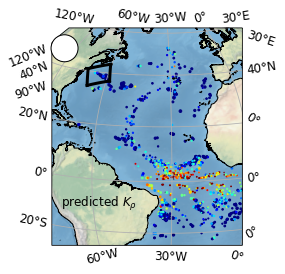

In [139]:
import scipy.io as io

########

matfile = 'data/seamount_data.mat'

SM = io.loadmat(matfile)

####

sm_K = ( SM['sm_Ro'] * SM['sm_Fr_height'] )**2

mask = np.logical_and.reduce((SM['sm_basin']==1\
                             ,SM['sm_height']>100\
                             ,SM['sm_Bu_height']>np.sqrt(1)\
                             ))

sm_lon = SM['sm_lon'][mask]
sm_lat = SM['sm_lat'][mask]
sm_id = SM['sm_id'][mask]
sm_height = SM['sm_height'][mask]
sm_hh_depth = SM['sm_hh_depth'][mask]

sm_Ro = SM['sm_Ro'][mask]   
sm_Fr = SM['sm_Fr_height'][mask]   
sm_Bu = SM['sm_Bu_height'][mask]**2
sm_K = (sm_Ro * sm_Fr)**2

sm_vel = SM['sm_vel'][mask]   
sm_vel_50m_Atl = SM['sm_vel_50m_Atl'][mask]   
sm_f = SM['sm_f'][mask]  

####


def plot_atlantic(ax, panel=' '):

    #central_lon, central_lat = -33,10
    #dlon = dlat = 1
    #extent = [simul.x.min()-dlon, simul.x.max()+dlon, simul.y.min()-dlat, simul.y.max()+dlat]
    #projection = ccrs.Orthographic(central_lon, central_lat)
    #ax = plt.axes(projection=projection)
    
    extent = [-80,-1,-20,60]

    ax.set_extent(extent); 
    ax.coastlines(resolution='10m')
    ax.gridlines(draw_labels=True)
    ax.stock_img(); 

    ################

    #CS1 = plt.scatter(sm_lon,sm_lat,c=sm_height, transform=ccrs.PlateCarree())
    #CS1 = plt.scatter(sm_lon,sm_lat,c=np.log10(sm_Ro), vmin=-2.,vmax=0., cmap = 'jet',transform=ccrs.PlateCarree())
    CS1 = plt.scatter(sm_lon,sm_lat,s=sm_height/500., c=np.log10(sm_K), vmin=-5.,vmax=-2, cmap = 'jet',transform=ccrs.PlateCarree())
    #CS1 = plt.scatter(sm_lon,sm_lat,c=np.log10(sm_Bu), vmin=-2,vmax=2, cmap = 'jet',transform=ccrs.PlateCarree())
    #plt.title('H$>100$ m;  Bu$>1$')

    # Now adding the colorbar
    #cbaxes = fig.add_axes([0.68, 0.54, 0.01, 0.1]) 
    #cb = plt.colorbar(CS1, cax = cbaxes)  
    #cb.ax.tick_params(labelsize=fontsize1)
    plt.text(0.05,0.15,r'predicted $K_{\rho}$',fontsize=fontsize1, \
             verticalalignment='bottom', horizontalalignment='left', transform=ax.transAxes)
    
    #for i,id in enumerate(sm_id[:]):
    #    ax.text(sm_lon[i],sm_lat[i],format(id),ha='left',fontsize=5,transform=ccrs.PlateCarree())

    color = 'w'; box = 'circle,pad=0.2'; props = dict(boxstyle=box, fc=color, ec='k', lw=1, alpha=1.)
    ax.text(0.05,0.95,panel, fontsize=fontsize3,  horizontalalignment='left', verticalalignment='top',\
                 bbox=props, transform=ax.transAxes)

    ########

    domaincolor = 'k'
    domainalpha = 1.
    ax.plot(simul.x[-1,:], simul.y[-1,:], color=domaincolor,alpha=domainalpha, linewidth=3, transform=ccrs.PlateCarree())
    ax.plot(simul.x[:,0], simul.y[:,0], color=domaincolor,alpha=domainalpha, linewidth=3, transform=ccrs.PlateCarree())
    ax.plot(simul.x[0,:], simul.y[0,:], color=domaincolor,alpha=domainalpha, linewidth=3, transform=ccrs.PlateCarree())
    ax.plot(simul.x[:,-1], simul.y[:,-1], color=domaincolor,alpha=domainalpha, linewidth=3, transform=ccrs.PlateCarree())


####
    
central_lon, central_lat = -33,10
#ax3a =  plt.subplot(3,4,5, projection=ccrs.Orthographic(central_lon, central_lat));
ax3a =  plt.subplot(1,1,1, projection=ccrs.Orthographic(central_lon, central_lat))
plot_atlantic(ax3a)





## Final Plot

/home/gula/.virtualenvs/croco36/lib/python3.6/site-packages/ipykernel_launcher.py:88: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
/home/gula/.virtualenvs/croco36/lib/python3.6/site-packages/ipykernel_launcher.py:106: UserWarning: The following kwargs were not used by contour: 'linewidth'
/home/gula/.virtualenvs/croco36/lib/python3.6/site-packages/ipykernel_launcher.py:79: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
/home/gula/.virtualenvs/croco36/lib/python3.6/site-packages/ipykernel_launcher.py:106: UserWarning: The following kwargs were not used by contour: 'linewidth'
/home/gula

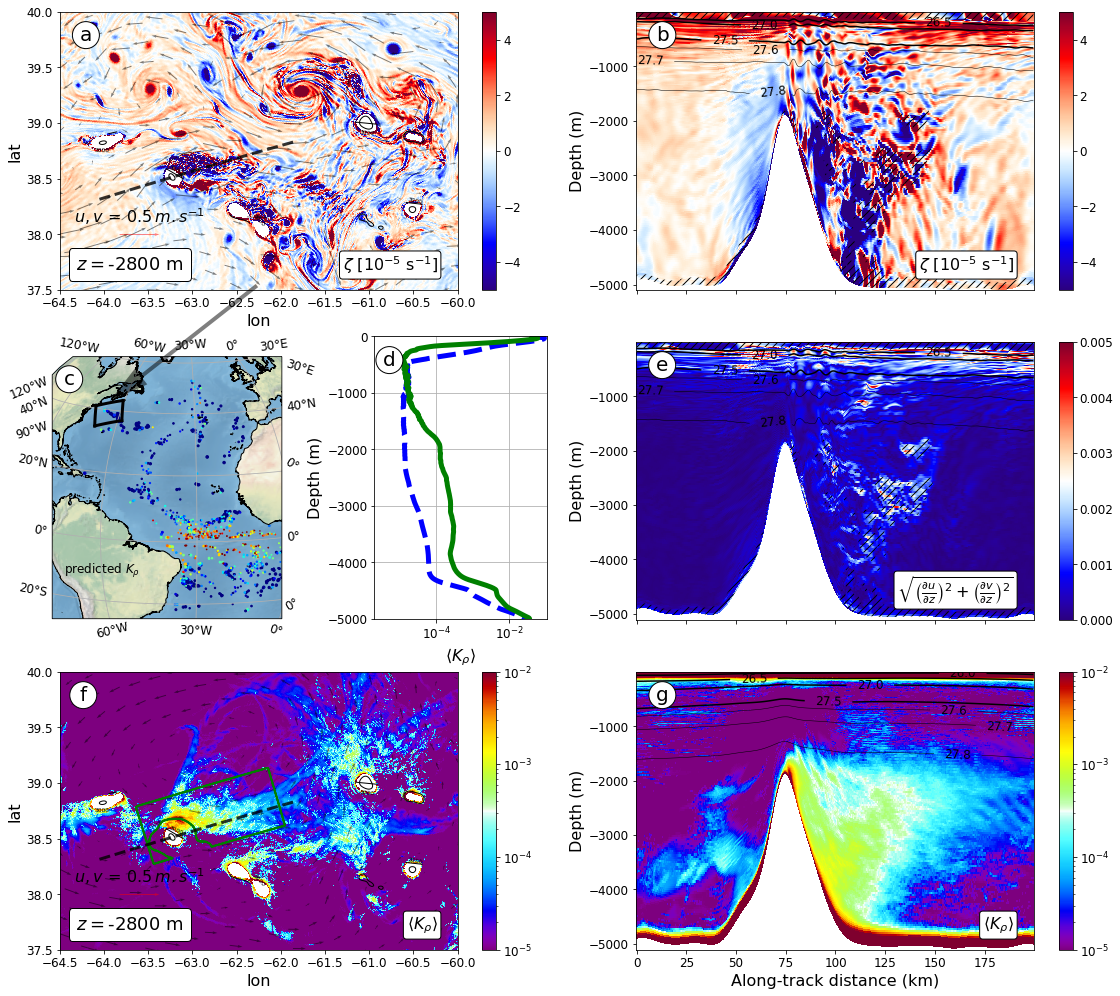

In [140]:
## from matplotlib.gridspec import GridSpec


###### # Plot  data
#################################################

fig = plt.figure(figsize=(16.0,14.0)) #, facecolor = 'Gainsboro')
fig.set_tight_layout(1.)
                 

###################

ax2 =  plt.subplot(3,2,4);
plot_section('dzu',dzurot,AKtrot,rhorot,simul_his_vert,\
             xaxis = 0, inset=False, mean=False, ax = ax2, panel = 'e')

###

ax3 =  plt.subplot(3,2,1);
plot_horizontal('vrt', vrt_horiz, u_horiz, v_horiz, mydepth = -2800, xaxis=1, panel='a', ax = ax3)

###

ax4 =  plt.subplot(3,2,2);
plot_section('vrt',vrtrot,AKtrot,rhorot,simul_his_vert,xaxis = 0,inset=False, mean=False, ax = ax4, panel = 'b')

###

ax5 =  plt.subplot(3,2,5);
plot_horizontal('AKt', AKt_horiz_mean, u_horiz_mean, v_horiz_mean, mydepth = -2800, panel='f', ax = ax5)
#plt.contour(lon,lat, mask1,colors = ('b',), linestyles = ('dashed',),linewidth=5,alpha=1.)
plt.contour(simul_zoom.x,simul_zoom.y, mask2,colors = ('g',),linewidth=5,alpha=1.)

###

ax6 =  plt.subplot(3,2,6);
plot_section('AKt',AKtrot_mean,AKtrot_mean,rhorot_mean,simul_vert,mean=True,inset=False, ax = ax6, panel = 'g')

###

central_lon, central_lat = -33,10
#ax3a =  plt.subplot(3,4,5, projection=ccrs.Orthographic(central_lon, central_lat));
ax3a =  fig.add_axes([0, 0.38, 0.3, 0.26], projection=ccrs.Orthographic(central_lon, central_lat))
plot_atlantic(ax3a, panel='c')            
       
ax3a.annotate(' ',
            xy=(0.25, 0.83),
            xytext=(0.9, 1.3), 
            size=30,
            # bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(
                            #arrowstyle="simple",
                            fc="k", ec="none",alpha=0.5
                            ,headlength=40,headwidth=20
                            ),
             xycoords=ax3a.transAxes)    

###

ax3b = fig.add_axes([0.33, 0.38, 0.15, 0.28]) #plt.subplot(3,5,7);
###
plt.semilogx(np.abs(AKt1),depths,'--',color='b',linewidth=5)
plt.semilogx(np.abs(AKt2),depths,color='g',linewidth=5)
plt.grid(); plt.ylabel(r'Depth (m)',fontsize=fontsize2);
plt.xlabel(r'$\left< K_{\rho} \right>$',fontsize=fontsize2)
plt.xlim([2e-6,1.1e-1]); plt.ylim([-5000,0])
color = 'w'; box = 'circle,pad=0.2'; props = dict(boxstyle=box, fc=color, ec='k', lw=1, alpha=1.)
ax3b.text(0.05,0.95,'d', fontsize=fontsize3,  horizontalalignment='left', verticalalignment='top',\
                 bbox=props, transform=ax3b.transAxes)
###

plt.subplots_adjust(wspace=0.1,hspace=0.2)
plt.savefig(folder + 'figure_4' ,bbox_inches='tight', transparent='true', dpi=200)

